In [1]:
from IPython.display import Image

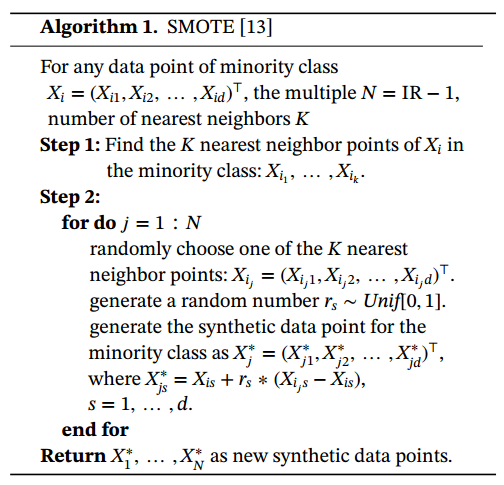

In [4]:
Image(r"C:\Users\user\Desktop\사진\SMOTE.PNG")

# synthetic minority oversampling technique(SMOTE)

In [165]:
from tqdm import tqdm
from scipy.spatial import distance
import pandas as pd
import time
import random
import numpy as np


# o : number of minority 
# n : IR-1
# IR : (negative_class/positive_class) negative_class is number of majority class
# k : number of nearest neighbors K
# data : minority class data 
def smote(o,n,k,data):
    dist=[]
    dis={}
    num=[]
    data_frame=pd.DataFrame()
    for j in tqdm(range(o)):
        for i in range(o):
            dis[i]=distance.euclidean(data.iloc[j],data.iloc[i])
        dis_sor = sorted(dis.items(), key = lambda item: item[1])
        dist.append(dis_sor[:k+1])

        for q in range(n):
            extraction=random.choice(dist[j][1:k+1])[0]
            r=np.random.uniform()
            new_data=data.iloc[j]+r*(data.iloc[extraction]-data.iloc[j])
            new_data_trans=pd.DataFrame(new_data).transpose()
            data_frame=pd.concat([data_frame,new_data_trans])
    
    return data_frame

# Example

In [181]:
card=pd.read_csv(r"C:\Users\user\Graduate\Workshop\2023_2\Practice\creditcard.csv")
new=card.iloc[101000:103505]
new_data=new[new['Class']==1]
sm=smote(8,311,5,new_data)
total=pd.concat([new,sm])

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.40it/s]


In [182]:
total['Class'].value_counts()

0.0    2497
1.0    2496
Name: Class, dtype: int64

In [183]:
total

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101000,67695.000000,1.368270,-1.288702,0.990046,-0.529092,-1.318179,1.328053,-1.826369,0.583871,1.165105,...,0.046284,0.427550,-0.204380,-1.323551,0.513656,0.079361,0.085713,0.004098,2.000000,0.0
101001,67696.000000,-0.912913,-0.209321,1.955110,-1.694350,-0.504715,1.380085,-0.844995,0.373938,0.588621,...,0.172253,0.921860,-0.449365,-1.246513,-0.140148,-0.230251,-0.629009,-0.410957,8.000000,0.0
101002,67696.000000,1.279606,0.256050,0.055345,0.581278,-0.192133,-0.783116,0.027679,-0.123411,0.196079,...,-0.328266,-1.001713,0.066681,-0.215791,0.256663,0.129798,-0.030648,0.024817,8.990000,0.0
101003,67697.000000,-0.855579,1.186266,1.466417,1.004627,-0.554076,-0.824699,0.561372,0.279317,-0.941091,...,-0.026405,-0.333857,0.156630,0.668479,-0.215051,-0.595011,-0.002514,0.067987,62.510000,0.0
101004,67697.000000,0.965378,0.050312,0.649348,2.404655,-0.066168,0.676405,-0.130766,0.149260,-0.596079,...,0.033009,-0.051580,-0.233133,-0.476572,0.511168,0.032033,-0.003998,0.029323,109.760000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,68353.473267,0.893444,-0.235407,0.829374,0.951127,-1.512245,-0.212980,-1.141485,-0.875145,-0.107242,...,0.201459,-0.714347,0.137228,0.667743,0.521050,-0.317581,0.108755,0.056681,19.152920,1.0
0,68263.008115,-7.806454,7.806886,-5.801433,2.414404,-3.543562,3.476101,-12.017445,-23.404954,-0.282831,...,16.878113,-5.761970,3.328099,-0.139599,0.361798,-0.188681,0.825698,0.601873,7.941272,1.0
0,68242.145062,-9.812823,9.661598,-7.330629,2.751864,-4.012024,4.326877,-14.525657,-28.600774,-0.323325,...,20.724079,-6.926052,4.063976,-0.325788,0.325071,-0.158954,0.991039,0.727604,5.355645,1.0
0,68291.494988,-5.066914,5.274421,-3.713436,1.953628,-2.903914,2.314434,-8.592678,-16.310468,-0.227539,...,11.626746,-4.172507,2.323315,0.114627,0.411945,-0.229271,0.599937,0.430195,11.471746,1.0
